Importig the Dependencies


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

Loading the MNIST data

In [3]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
type(X_train)

numpy.ndarray

In [5]:
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


Training Data = 60,000 images

Test Data = 10,000 images

Image Dimention --> 28 x 28

Grayscale Image --> 1 channel

In [6]:
#printing the 10th image

print(X_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

In [7]:
print(X_train[10].shape)

(28, 28)


3


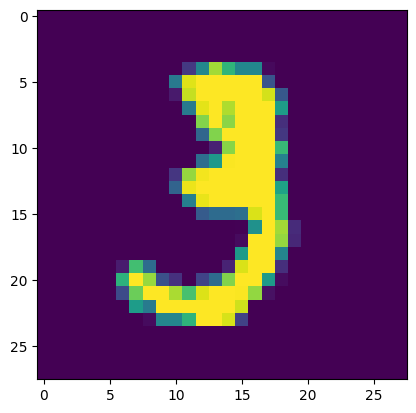

In [8]:
#displaying the image
plt.imshow(X_train[10])
print(Y_train[10])

Image Labels

In [9]:
print(Y_train.shape,Y_test.shape)

(60000,) (10000,)


In [10]:
#unique values in Y_train
print(np.unique(Y_train))

[0 1 2 3 4 5 6 7 8 9]


All images should have the same size to have the best prediction

In [11]:
#scaling the values to bring it in 0-1 range

X_train = X_train/255
X_test = X_test/255

Building the Neural Network

In [12]:
#setting up the lyers of the neural network
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [13]:
#compiling the neural network

model.compile(optimizer='adam',
              loss= 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [14]:
#training the Neuaral Network
model.fit(X_train,Y_train, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8517 - loss: 0.5041
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9564 - loss: 0.1459
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9687 - loss: 0.1046
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9756 - loss: 0.0807
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9801 - loss: 0.0671
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9832 - loss: 0.0563
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9854 - loss: 0.0477
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9866 - loss: 0.0423
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9893 - loss: 0.0349
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9894 - loss: 0.0314


Training Data Accuracy = 99.07%

Accuracy on Test Data

In [15]:
loss, accuracy = model.evaluate(X_test, Y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9674 - loss: 0.1429


In [16]:
print(accuracy)

0.9700000286102295


Test Data Accuracy = 96.81%

In [17]:
print(X_test.shape)

(10000, 28, 28)


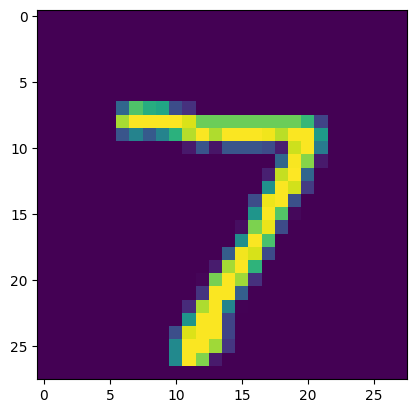

In [18]:
#first data pointin X_test
plt.imshow(X_test[0])

In [19]:
print(Y_test[0])

7


In [20]:
Y_pred = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [21]:
print(Y_pred.shape)

(10000, 10)


In [22]:
#converting the prediction probability into class label

label_for_first_test_image = np.argmax(Y_pred[0])
print(label_for_first_test_image)

7


In [24]:
Y_pred_labels = [np.argmax(i) for i in Y_pred]
print(Y_pred_labels)

[np.int64(7), np.int64(2), np.int64(1), np.int64(0), np.int64(4), np.int64(1), np.int64(4), np.int64(9), np.int64(5), np.int64(9), np.int64(0), np.int64(6), np.int64(9), np.int64(0), np.int64(1), np.int64(5), np.int64(9), np.int64(7), np.int64(3), np.int64(4), np.int64(9), np.int64(6), np.int64(6), np.int64(5), np.int64(4), np.int64(0), np.int64(7), np.int64(4), np.int64(0), np.int64(1), np.int64(3), np.int64(1), np.int64(3), np.int64(4), np.int64(7), np.int64(2), np.int64(7), np.int64(1), np.int64(2), np.int64(1), np.int64(1), np.int64(7), np.int64(4), np.int64(2), np.int64(3), np.int64(5), np.int64(1), np.int64(2), np.int64(4), np.int64(4), np.int64(6), np.int64(3), np.int64(5), np.int64(5), np.int64(6), np.int64(0), np.int64(4), np.int64(1), np.int64(9), np.int64(5), np.int64(7), np.int64(2), np.int64(9), np.int64(3), np.int64(7), np.int64(4), np.int64(6), np.int64(4), np.int64(3), np.int64(0), np.int64(7), np.int64(0), np.int64(2), np.int64(9), np.int64(1), np.int64(7), np.int64(3)

Y_test --> True Lables

Y_pred_labels --> Predicted Labels

Confusion Matrix

In [25]:
conf_mat = confusion_matrix(Y_test, Y_pred_labels)
print(conf_mat)

tf.Tensor(
[[ 956    1    1    1    1    2    1    0    2   15]
 [   1 1114    0    5    4    0    2    1    7    1]
 [   2    1  997   14    3    0    1    5    6    3]
 [   0    0    4  979    3    7    0    4    4    9]
 [   0    0    8    0  963    0    3    1    0    7]
 [   1    0    0   12    5  853    9    0    6    6]
 [   3    2    4    1    7    3  936    0    2    0]
 [   1    2    8    5    3    0    0  974    4   31]
 [   1    1    3   11    2    3    1    2  942    8]
 [   0    3    0    0   13    1    0    5    2  985]], shape=(10, 10), dtype=int32)


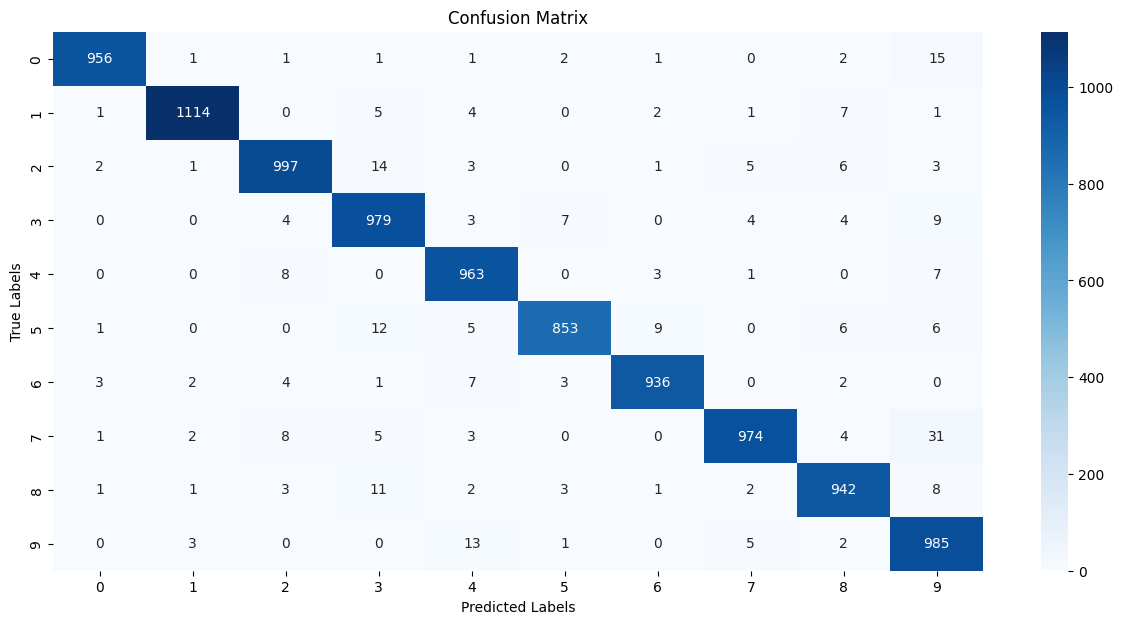

In [26]:
plt.figure(figsize=(15,7))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.ylabel("True Labels")
plt.xlabel("Predicted Labels")
plt.title("Confusion Matrix")
plt.show()

Building a Predictive System

In [30]:
input_image_path = '/content/download.jpeg'

input_image = cv2.imread(input_image_path)

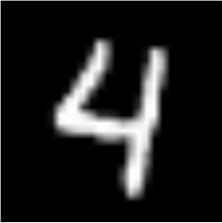

In [31]:
cv2_imshow(input_image)

In [32]:
input_image.shape

(223, 222, 3)

In [34]:
grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

In [36]:
grayscale.shape

(223, 222)

In [38]:
input_image_resize = cv2.resize(grayscale, (28,28))

In [39]:
input_image_resize.shape

(28, 28)

In [40]:
cv2_imshow(input_image_resize)

In [41]:
input_image_resize = input_image_resize/255

In [42]:
image_reshaped = np.reshape(input_image_resize, [1,28,28])

In [43]:
input_prediction = model.predict(image_reshaped)
print(input_prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
[[4.2041138e-04 2.2393261e-08 2.5203880e-03 6.3968266e-09 1.0000000e+00
  1.3751944e-03 2.2205415e-03 1.5289509e-01 4.8519977e-04 9.9725348e-01]]


In [46]:
input_pred_label = np.argmax(input_prediction)
print(input_pred_label)

4


Prediction System

In [ ]:
input_image_path = input("Enter the Image Path : ")

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

input_image_resize = cv2.resize(grayscale, (28,28))

input_image_resize = input_image_resize/255

image_reshaped = np.reshape(input_image_resize, [1,28,28])

input_prediction = model.predict(image_reshaped)
print(input_prediction)


input_pred_label = np.argmax(input_prediction)
print(input_pred_label)